## Project Houses

## Description of the dataset

In Belgium, housing prices are booming the last couple of years. As a consequence, more
young people are struggling to find good and affordable houses on the market. In this project,
data have been collected on Belgian houses that were offered for sale. Important information
concerning the location, characteristics of the house and asking price were gathered, and
stored in houses.xlsx.

__Target of the project:__
     Build a decision tree to predict the asking price of a house based on the other variables
in the dataset. Use cross-validation to obtain the optimal hyperparameters. Is location
important for predicting the asking price of a house?

In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import explained_variance_score
import seaborn as sns
from sklearn.metrics import mean_absolute_error


In [327]:
my_sheet = 'Data'
file_name = 'houses.xlsx' # change it to the name of your excel file
houses_df =pd.read_excel(file_name, sheet_name = my_sheet)
houses_df2=houses_df.copy()

In [328]:
houses_df.head()

,Unnamed: 0,State of the building,Number of facades,Habitable surface,Bedrooms,Bathrooms,Area of ​​the plot,Primary energy consumption,"Gas, water & electricity",Energy class,Heating type,Double glass,Price,Zip code,Township
0,6,To renovate,3,211,3,1,396,466.0,Yes,E,NaN,Yes,296000,9700,Oudenaarde
1,7,Excellent state,2,210,4,1,267,212.0,Yes,C,Gas,Yes,279000,9700,Oudenaarde
2,51,To renovate,3,280,4,2,880,576.0,No,G,Oil fuel,Yes,1350000,1060,Saint-Gilles
3,52,Good,2,180,4,1,182,358.0,Yes,D,Gas,NaN,399000,2000,Antwerpen
4,55,Good,2,105,2,1,336,247.0,Yes,C,Gas,Yes,279000,2000,Antwerpen


In [329]:
coo_df =pd.read_excel(file_name, sheet_name = 'LongLati')

In [330]:
#i=1
#len(set(houses_df.iloc[:,-2:].drop_duplicates().iloc[:,i]))!=len((houses_df.iloc[:,-2:].drop_duplicates().iloc[:,i]))
#houses_df['Zip code'].corr(houses_df['Township'])
houses_df = houses_df2.copy()
label_encoder = preprocessing.LabelEncoder()
labels = ['To restore', 'To renovate', 'To refresh', 'Good', 'Just renovated', 'Excellent state']
label_encoder.fit(labels)
# houses_df['State of the building']= label_encoder.transform(houses_df['State of the building'])
# cols = houses_df.columns
# cols[-2]='Zip code'
# houses_df.columns = cols 
houses_df['State of the building'] = houses_df['State of the building'].apply(lambda x: labels.index(x))

houses_df

,Unnamed: 0,State of the building,Number of facades,Habitable surface,Bedrooms,Bathrooms,Area of ​​the plot,Primary energy consumption,"Gas, water & electricity",Energy class,Heating type,Double glass,Price,Zip code,Township
0,6,1,3,211,3,1,396,466.0,Yes,E,NaN,Yes,296000,9700,Oudenaarde
1,7,5,2,210,4,1,267,212.0,Yes,C,Gas,Yes,279000,9700,Oudenaarde
2,51,1,3,280,4,2,880,576.0,No,G,Oil fuel,Yes,1350000,1060,Saint-Gilles
3,52,3,2,180,4,1,182,358.0,Yes,D,Gas,NaN,399000,2000,Antwerpen
4,55,3,2,105,2,1,336,247.0,Yes,C,Gas,Yes,279000,2000,Antwerpen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,5890,5,4,80,2,1,792,286.0,Yes,C,Gas,Yes,339000,2970,Schilde
1327,5892,5,2,112,3,1,87,341.0,Yes,D,Gas,Yes,209000,8790,Waregem
1328,5917,2,2,120,4,1,689,172.0,No,C,Oil fuel,Yes,295000,1410,Waterloo
1329,5919,4,2,156,2,1,1,337.0,Yes,D,Pellets,Yes,160000,6840,Neufchateau


In [331]:
coo_df.head()



,"Zip code, Township, Longitude, Latitude"
0,"1000,Bruxelles,4.351697,50.8465573"
1,"1020,Laeken,4.3487134,50.883392"
2,"1030,Schaerbeek,4.3737121,50.8676041"
3,"1040,Etterbeek,4.3895104,50.8368511"
4,"1050,Ixelles,4.3815707,50.8222854"


In [332]:
expvar_df =pd.read_excel(file_name, sheet_name = 'Explanation Variables')

In [333]:
expvar_df.head() #explanation variables


,Unnamed: 0,Unnamed: 1
0,State of the building,NaN
1,Number of facades,NaN
2,Habitable surface,in m^2
3,Bedrooms,NaN
4,Bathrooms,NaN


## Data frame Formating

In [334]:
#splitting coordinates table into columns
coo_dfsplit=coo_df['Zip code, Township, Longitude, Latitude'].str.split(',',n=4, expand= True)

In [335]:
coo_dfsplit

,0,1,2,3
0,1000,Bruxelles,4.351697,50.8465573
1,1020,Laeken,4.3487134,50.883392
2,1030,Schaerbeek,4.3737121,50.8676041
3,1040,Etterbeek,4.3895104,50.8368511
4,1050,Ixelles,4.3815707,50.8222854
...,...,...,...,...
2752,9988,Waterland-Oudeman,3.5905485,51.2891181
2753,9988,Watervliet,3.626982177111,51.2776499
2754,9990,Maldegem,3.4154538,51.2263133
2755,9991,Adegem,3.4858471,51.2035291


In [336]:
coo_dfsplit.columns = ['Zip code', 'Township', 'Longitude', 'Latitude']

In [337]:
coo_dfsplit

,Zip code,Township,Longitude,Latitude
0,1000,Bruxelles,4.351697,50.8465573
1,1020,Laeken,4.3487134,50.883392
2,1030,Schaerbeek,4.3737121,50.8676041
3,1040,Etterbeek,4.3895104,50.8368511
4,1050,Ixelles,4.3815707,50.8222854
...,...,...,...,...
2752,9988,Waterland-Oudeman,3.5905485,51.2891181
2753,9988,Watervliet,3.626982177111,51.2776499
2754,9990,Maldegem,3.4154538,51.2263133
2755,9991,Adegem,3.4858471,51.2035291


In [339]:
coo_dfsplit.head().dtypes
types = {"Zip code":'int64',"Township":str,"Longitude":'double',"Latitude":'double'}
coo_dfsplit = coo_dfsplit.astype(types)

In [340]:
coo_dfsplit.head(20)
(coo_dfsplit['Township']=="Bruxelles").value_counts()
(x0, y0) = 4.351697, 50.846557

coo_dfsplit['dist'] = coo_dfsplit.apply(lambda row : np.sqrt((row["Longitude"]-x0)**2+(row["Latitude"]-y0)**2)*100, axis = 1)

coo_dfsplit.head(20)

,Zip code,Township,Longitude,Latitude,dist
0,1000,Bruxelles,4.351697,50.846557,0.000030
1,1020,Laeken,4.348713,50.883392,3.695564
2,1030,Schaerbeek,4.373712,50.867604,3.045727
3,1040,Etterbeek,4.389510,50.836851,3.903918
4,1050,Ixelles,4.381571,50.822285,3.849089
5,1060,Saint-Gilles,4.345668,50.826741,2.071296
6,1070,Anderlecht,4.312340,50.838141,4.024665
7,1080,Molenbeek-Saint-Jean,4.322778,50.854355,2.995204
8,1081,Koekelberg,4.325708,50.862263,3.036602
9,1082,Berchem-Sainte-Agathe,4.292702,50.863984,6.151498


In [341]:

merged = pd.merge(houses_df, coo_dfsplit, how = 'left')
merged.isna().count()

Unnamed: 0                    1331
State of the building         1331
Number of facades             1331
Habitable surface             1331
Bedrooms                      1331
Bathrooms                     1331
Area of ​​the plot            1331
Primary energy consumption    1331
Gas, water & electricity      1331
Energy class                  1331
Heating type                  1331
Double glass                  1331
Price                         1331
Zip code                      1331
Township                      1331
Longitude                     1331
Latitude                      1331
dist                          1331
dtype: int64

In [342]:
houses_full=merged

In [343]:
houses_full

,Unnamed: 0,State of the building,Number of facades,Habitable surface,Bedrooms,Bathrooms,Area of ​​the plot,Primary energy consumption,"Gas, water & electricity",Energy class,Heating type,Double glass,Price,Zip code,Township,Longitude,Latitude,dist
0,6,1,3,211,3,1,396,466.0,Yes,E,NaN,Yes,296000,9700,Oudenaarde,3.604782,50.844260,74.691853
1,7,5,2,210,4,1,267,212.0,Yes,C,Gas,Yes,279000,9700,Oudenaarde,3.604782,50.844260,74.691853
2,51,1,3,280,4,2,880,576.0,No,G,Oil fuel,Yes,1350000,1060,Saint-Gilles,4.345668,50.826741,2.071296
3,52,3,2,180,4,1,182,358.0,Yes,D,Gas,NaN,399000,2000,Antwerpen,4.399708,51.221110,37.761725
4,55,3,2,105,2,1,336,247.0,Yes,C,Gas,Yes,279000,2000,Antwerpen,4.399708,51.221110,37.761725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,5890,5,4,80,2,1,792,286.0,Yes,C,Gas,Yes,339000,2970,Schilde,4.595516,51.257095,47.748196
1327,5892,5,2,112,3,1,87,341.0,Yes,D,Gas,Yes,209000,8790,Waregem,3.425738,50.876200,92.643333
1328,5917,2,2,120,4,1,689,172.0,No,C,Oil fuel,Yes,295000,1410,Waterloo,4.397805,50.717356,13.718142
1329,5919,4,2,156,2,1,1,337.0,Yes,D,Pellets,Yes,160000,6840,Neufchateau,NaN,NaN,NaN


In [276]:
tableau=houses_full.nlargest(1331,'Price')

In [277]:
tableau.head()

,Unnamed: 0,State of the building,Number of facades,Habitable surface,Bedrooms,Bathrooms,Area of ​​the plot,Primary energy consumption,"Gas, water & electricity",Energy class,Heating type,Double glass,Price,Zip code,Township,Longitude,Latitude
540,2216,5,2,1150,10,8,630,208.0,Yes,D,Gas,Yes,4700000,1180,Uccle,4.337235,50.801820
553,2253,5,2,1000,11,8,630,208.0,No,D,Gas,Yes,4700000,1050,Bruxelles,NaN,NaN
554,2255,5,4,545,5,5,2003,105.0,Yes,B,Gas,Yes,3250000,1050,Ixelles,4.381571,50.822285
734,3029,3,4,506,5,3,8797,208.0,No,C,NaN,Yes,2800000,2930,Brasschaat,4.489307,51.293093
877,3733,5,2,668,6,5,690,203.0,Yes,D,Gas,Yes,2750000,1050,Ixelles,4.381571,50.822285


## Exploratory Data Analysis

In [344]:
#number of observations in houses dataframe
len(houses_full)

1331

In [345]:
#exploring missing values
houses_full.isna().sum()

Unnamed: 0                      0
State of the building           0
Number of facades               0
Habitable surface               0
Bedrooms                        0
Bathrooms                       0
Area of ​​the plot              0
Primary energy consumption      0
Gas, water & electricity        0
Energy class                    0
Heating type                  228
Double glass                  223
Price                           0
Zip code                        0
Township                        0
Longitude                     272
Latitude                      272
dist                          272
dtype: int64

The percentage of missing values for heating type and double glass are approximately 17% but it is not relevant in our research
we can drop these 2 columns as we have a more important variable without missing values, the Energy class which intuitively is 
in direct correlation with Heating Type and Double glass.

In [346]:
houses_full.drop(['Heating type','Double glass'],axis=1,inplace=True)
#houses_df.drop('Unnamed: 0',axis=1,inplace=True)

Checking the distribution of the condition of the houses

In [347]:
df1 = houses_df['State of the building'].value_counts()
print(df1)
df1 = houses_df['Energy class'].value_counts()
print(df1)

3    609
5    251
1    215
2    176
4     74
0      6
Name: State of the building, dtype: int64
F      294
C      256
D      229
E      224
B      173
G      119
A       33
A+       1
E_D      1
D_C      1
Name: Energy class, dtype: int64


##  Plot of histograms of numeric columns and basic statistics 

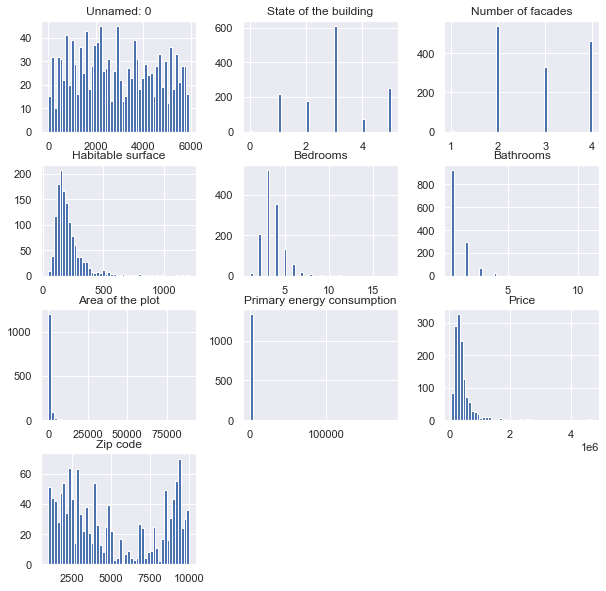

In [348]:
houses_df.hist(figsize = [10, 10], bins = 50)
plt.show()

In [349]:
houses_full.describe()

,Unnamed: 0,State of the building,Number of facades,Habitable surface,Bedrooms,Bathrooms,Area of ​​the plot,Primary energy consumption,Price,Zip code,Longitude,Latitude,dist
count,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1.331000e+03,1331.000000,1059.000000,1059.000000,1059.000000
mean,2884.109692,2.963937,2.935387,209.625845,3.579264,1.471826,902.100676,588.313584,4.271203e+05,5045.555222,4.390218,50.882795,64.793901
std,1673.711984,1.276234,0.870763,124.775665,1.405785,0.973210,2838.046317,5460.844166,3.676399e+05,3016.341945,0.727429,0.263210,42.545364
min,6.000000,0.000000,1.000000,45.000000,1.000000,1.000000,1.000000,17.000000,7.000000e+04,1000.000000,2.654886,49.682763,0.000030
25%,1475.500000,2.000000,2.000000,135.000000,3.000000,1.000000,180.000000,235.000000,2.445000e+05,2320.000000,3.886472,50.733978,32.661076
50%,2802.000000,3.000000,3.000000,176.000000,3.000000,1.000000,401.000000,355.000000,3.300000e+05,4053.000000,4.397805,50.871240,58.221279
75%,4306.000000,3.000000,4.000000,240.000000,4.000000,2.000000,875.500000,498.500000,4.750000e+05,8501.000000,4.840060,51.065393,99.351843
max,5934.000000,5.000000,4.000000,1210.000000,17.000000,11.000000,89205.000000,184016.000000,4.700000e+06,9991.000000,6.122466,51.395741,186.726161


Correlation heatmap

<AxesSubplot:>

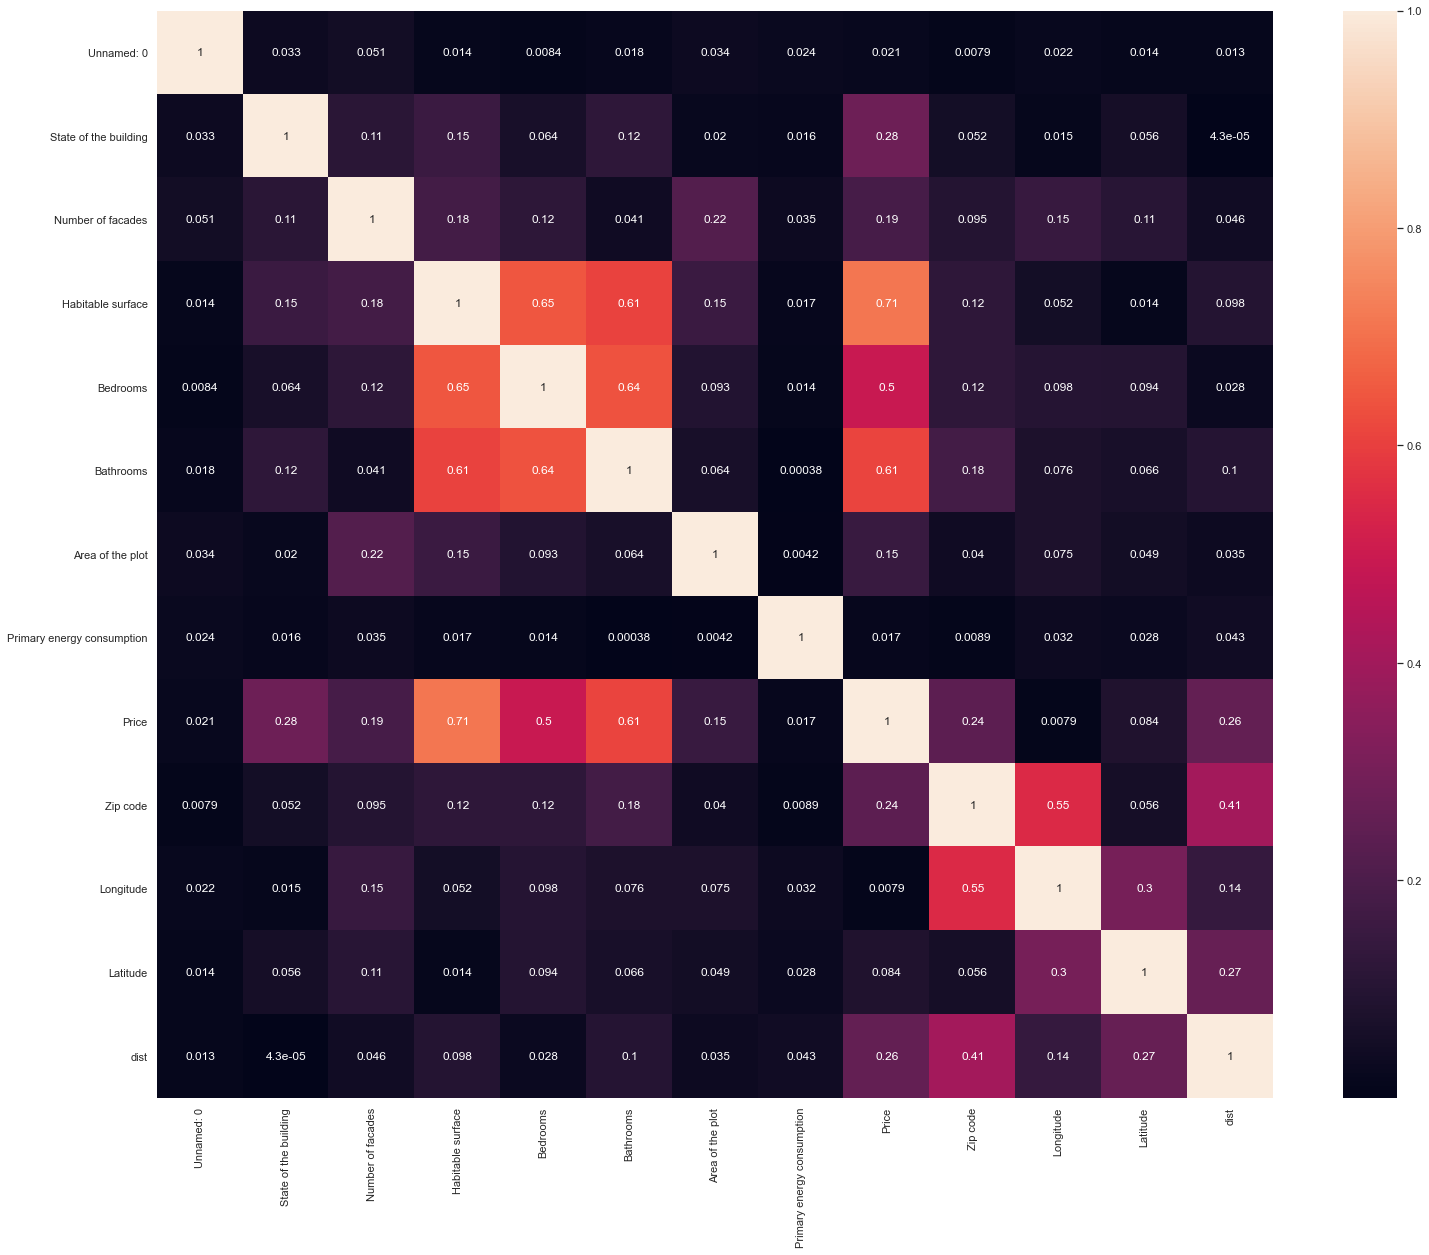

In [350]:

plt.figure(figsize=(25,20))

sns.heatmap(abs(houses_full.corr()),annot=True)


In [351]:
houses_full.describe()

,Unnamed: 0,State of the building,Number of facades,Habitable surface,Bedrooms,Bathrooms,Area of ​​the plot,Primary energy consumption,Price,Zip code,Longitude,Latitude,dist
count,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1331.000000,1.331000e+03,1331.000000,1059.000000,1059.000000,1059.000000
mean,2884.109692,2.963937,2.935387,209.625845,3.579264,1.471826,902.100676,588.313584,4.271203e+05,5045.555222,4.390218,50.882795,64.793901
std,1673.711984,1.276234,0.870763,124.775665,1.405785,0.973210,2838.046317,5460.844166,3.676399e+05,3016.341945,0.727429,0.263210,42.545364
min,6.000000,0.000000,1.000000,45.000000,1.000000,1.000000,1.000000,17.000000,7.000000e+04,1000.000000,2.654886,49.682763,0.000030
25%,1475.500000,2.000000,2.000000,135.000000,3.000000,1.000000,180.000000,235.000000,2.445000e+05,2320.000000,3.886472,50.733978,32.661076
50%,2802.000000,3.000000,3.000000,176.000000,3.000000,1.000000,401.000000,355.000000,3.300000e+05,4053.000000,4.397805,50.871240,58.221279
75%,4306.000000,3.000000,4.000000,240.000000,4.000000,2.000000,875.500000,498.500000,4.750000e+05,8501.000000,4.840060,51.065393,99.351843
max,5934.000000,5.000000,4.000000,1210.000000,17.000000,11.000000,89205.000000,184016.000000,4.700000e+06,9991.000000,6.122466,51.395741,186.726161


## Calculation of mean values of Prices based on state of the bulding

In [352]:
stateofbuld_to_price=houses_full.groupby(['State of the building']).apply(lambda x: x ['Price'].sum()/len(x))

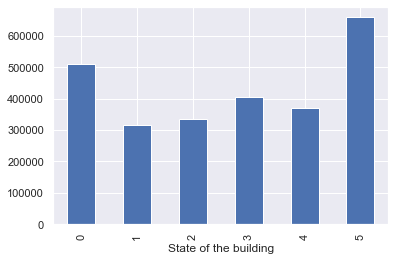

In [353]:
#plot State of the building vs prices
stateofbuld_to_price.plot.bar()
plt.show()

## Preprocessing of inputs

Before starting the building of the tree, we have to encode the categorical variables to numeric. Althought Desicion tree
have no issue with the categorical variables, it will perform better with the encoding

Between label encoding and one-hot encoding we will chose the first one as there is ranking in our categorical variables
and we want to capture the relationship between these categories.

In [354]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Energy class'. 
houses_full['Energy class']= label_encoder.fit_transform(houses_full['Energy class'])
print(houses_full.head())

   Unnamed: 0  State of the building  Number of facades  Habitable surface  \
0           6                      1                  3                211   
1           7                      5                  2                210   
2          51                      1                  3                280   
3          52                      3                  2                180   
4          55                      3                  2                105   

   Bedrooms  Bathrooms  Area of ​​the plot  Primary energy consumption  \
0         3          1                 396                       466.0   
1         4          1                 267                       212.0   
2         4          2                 880                       576.0   
3         4          1                 182                       358.0   
4         2          1                 336                       247.0   

  Gas, water & electricity  Energy class    Price  Zip code      Township  \
0        

In [355]:
df1 = houses_full['Energy class'].value_counts()
print(df1)

8    294
3    256
4    229
6    224
2    173
9    119
0     33
1      1
7      1
5      1
Name: Energy class, dtype: int64


Laber encoding for gas,water and electricity column

In [356]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Energy class'. 
houses_full['Gas, water & electricity']= label_encoder.fit_transform(houses_full['Gas, water & electricity'])
print(houses_full.head())

   Unnamed: 0  State of the building  Number of facades  Habitable surface  \
0           6                      1                  3                211   
1           7                      5                  2                210   
2          51                      1                  3                280   
3          52                      3                  2                180   
4          55                      3                  2                105   

   Bedrooms  Bathrooms  Area of ​​the plot  Primary energy consumption  \
0         3          1                 396                       466.0   
1         4          1                 267                       212.0   
2         4          2                 880                       576.0   
3         4          1                 182                       358.0   
4         2          1                 336                       247.0   

   Gas, water & electricity  Energy class    Price  Zip code      Township  \
0       

In [357]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Energy class'. 
houses_full['Township']= label_encoder.fit_transform(houses_full['Township'])
print(houses_full.head())

   Unnamed: 0  State of the building  Number of facades  Habitable surface  \
0           6                      1                  3                211   
1           7                      5                  2                210   
2          51                      1                  3                280   
3          52                      3                  2                180   
4          55                      3                  2                105   

   Bedrooms  Bathrooms  Area of ​​the plot  Primary energy consumption  \
0         3          1                 396                       466.0   
1         4          1                 267                       212.0   
2         4          2                 880                       576.0   
3         4          1                 182                       358.0   
4         2          1                 336                       247.0   

   Gas, water & electricity  Energy class    Price  Zip code  Township  \
0           

When we try to convert "state of the building " with Label encoder the results are not ordinal 
and we need to make some tricks to fix the order of the labels. Decision trees can handle both categorical and numerical data
so "state of the building and" and " Gas, water & electricity" columns will be left as they are.

In [655]:
houses_full.to_csv("houses_after_eda.csv")

## Import dataset after EDA

In [656]:
clean_df = pd.read_csv("houses_after_eda.csv", index_col=0)
clean_df.head()


,Unnamed: 0,State of the building,Number of facades,Habitable surface,Bedrooms,Bathrooms,Area of ​​the plot,Primary energy consumption,"Gas, water & electricity",Energy class,Price,Zip code,Township,Longitude,Latitude,dist
0,6,1,3,211,3,1,396,466.0,1,6,296000,9700,230,3.604782,50.844260,74.691853
1,7,5,2,210,4,1,267,212.0,1,3,279000,9700,230,3.604782,50.844260,74.691853
2,51,1,3,280,4,2,880,576.0,0,9,1350000,1060,254,4.345668,50.826741,2.071296
3,52,3,2,180,4,1,182,358.0,1,4,399000,2000,9,4.399708,51.221110,37.761725
4,55,3,2,105,2,1,336,247.0,1,3,279000,2000,9,4.399708,51.221110,37.761725


In [657]:
clean_df.drop(columns=['Longitude','Latitude','dist'],axis=1,inplace=True)
#'Area of ​​the plot','Primary energy consumption','Number of facades','Bathrooms'

In [658]:
#Passing value 0.1 at sigma parameter to introduce noise
loo_encoder=ce.LeaveOneOutEncoder(cols='Zip code', sigma = 0.1)
loo_res = pd.DataFrame(loo_encoder.fit_transform(clean_df['Zip code'], clean_df['Price']).rename(columns = {'Zip code': 'Zip code2'}))


In [660]:
clean_df = clean_df.join(loo_res)
clean_df.head()

,Unnamed: 0,State of the building,Number of facades,Habitable surface,Bedrooms,Bathrooms,Area of ​​the plot,Primary energy consumption,"Gas, water & electricity",Energy class,Price,Zip code,Township,Zip code2
0,6,1,3,211,3,1,396,466.0,1,6,296000,9700,230,429671.659508
1,7,5,2,210,4,1,267,212.0,1,3,279000,9700,230,435193.784714
2,51,1,3,280,4,2,880,576.0,0,9,1350000,1060,254,462560.425750
3,52,3,2,180,4,1,182,358.0,1,4,399000,2000,9,558476.897551
4,55,3,2,105,2,1,336,247.0,1,3,279000,2000,9,521130.066506


In [661]:
clean_df.drop('Zip code',axis=1,inplace=True)

In [640]:
#import category_encoders as ce
#encoder=ce.HashingEncoder(cols='Zip code',n_components=100)
#hash_res = pd.DataFrame(encoder.fit_transform(clean_df['Zip code']))
#hash_res.sample(5)
#clean_df = clean_df.join(hash_res)


In [662]:
#clean_df=clean_df[clean_df['dist'].notna()]

#from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
#enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
#enc_df = pd.DataFrame(enc.fit_transform(clean_df[['Zip code']]).toarray())
# merge with main df bridge_df on key values
#clean_df = clean_df.join(enc_df)
clean_df.head()

,Unnamed: 0,State of the building,Number of facades,Habitable surface,Bedrooms,Bathrooms,Area of ​​the plot,Primary energy consumption,"Gas, water & electricity",Energy class,Price,Township,Zip code2
0,6,1,3,211,3,1,396,466.0,1,6,296000,230,429671.659508
1,7,5,2,210,4,1,267,212.0,1,3,279000,230,435193.784714
2,51,1,3,280,4,2,880,576.0,0,9,1350000,254,462560.425750
3,52,3,2,180,4,1,182,358.0,1,4,399000,9,558476.897551
4,55,3,2,105,2,1,336,247.0,1,3,279000,9,521130.066506


In [663]:
clean_df.count()

Unnamed: 0                    1331
State of the building         1331
Number of facades             1331
Habitable surface             1331
Bedrooms                      1331
Bathrooms                     1331
Area of ​​the plot            1331
Primary energy consumption    1331
Gas, water & electricity      1331
Energy class                  1331
Price                         1331
Township                      1331
Zip code2                     1331
dtype: int64

In [664]:
y=clean_df.Price
y.head()

0     296000
1     279000
2    1350000
3     399000
4     279000
Name: Price, dtype: int64

Our target variable price is continuous so this s a regression problem.

We will make use of Decision tree, this means that the model predicts the value of the prices by simple decision rules 
inferred from the data features(below).

In [665]:
X=clean_df.drop('Price',axis=1)
X.head()


,Unnamed: 0,State of the building,Number of facades,Habitable surface,Bedrooms,Bathrooms,Area of ​​the plot,Primary energy consumption,"Gas, water & electricity",Energy class,Township,Zip code2
0,6,1,3,211,3,1,396,466.0,1,6,230,429671.659508
1,7,5,2,210,4,1,267,212.0,1,3,230,435193.784714
2,51,1,3,280,4,2,880,576.0,0,9,254,462560.425750
3,52,3,2,180,4,1,182,358.0,1,4,9,558476.897551
4,55,3,2,105,2,1,336,247.0,1,3,9,521130.066506


For supervised ML we split our data set into a train set and a test set.
We will train our model in the first one and evaluate it in the second one.
We split it randomly.

In [666]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.20,
                                                   shuffle=True, random_state=18)


In [667]:
model = DecisionTreeRegressor()
grid = { 

    'max_features': [0,5,10,15],
    'min_samples_split':[2,5,10,15,100],
    'min_samples_leaf': [2,4,10,15],
    'max_depth' : [4,5,6,7,8,9,10,11, 50, 100,200,300]
    
}

gs = GridSearchCV(model,
                  param_grid = grid,
                  cv=10,
                  n_jobs=3,
                 scoring="neg_mean_absolute_error")        
                  
#['sqrt', 'log2'],'criterion': ["squared_error", "friedman_mse", "absolute_error", "poisson"]
gs.fit(X_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)


{'max_depth': 11, 'max_features': 5, 'min_samples_leaf': 15, 'min_samples_split': 15}
132303.5187552211


In [670]:
new_model = DecisionTreeRegressor(max_depth=7,max_features=5,min_samples_leaf=15,min_samples_split=15,random_state=18)
new_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, max_features=5, min_samples_leaf=15,
                      min_samples_split=15, random_state=18)

Finally, we test our model on X_test. Then we evaluate the model performance by comparing
its predictions with the actual true values in y_test using the MAE metric as we described above:


In [671]:
y_pred= new_model.predict(X_test)
final_mae=mean_absolute_error(y_test,y_pred)
print("Decision Tree MAE=",final_mae)
y_pred_test = new_model.predict(X_test)

Decision Tree MAE= 118441.37957118856


Our model has MAE of 120.140 thi means that on average, Decision tree will predict a value that is bigger or smaller that the true value by 120.140 euros. In order to understand if this MAE is good we need to know the range of the prices. Below is the plot of the Prices
in our dataset.

Plot with prices in our dataset

In [624]:
y_train.describe(include=[np.number])

count    1.064000e+03
mean     4.302272e+05
std      3.833917e+05
min      8.000000e+04
25%      2.450000e+05
50%      3.300000e+05
75%      4.750000e+05
max      4.700000e+06
Name: Price, dtype: float64

We notice that that the mean is 430.000 euros and the meadian is 330.000 euros. Also, 75% of the prices in the dataset
are larger than 245.000 euros. Our error of 122.000 euro is a lot but we can see that most of the prices (75%) are larger
than 245.000euros.